In [33]:
#test what the format of the chandra region files are

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import numpy as np
from astropy.io import fits
from astropy.utils.data import download_file
import astropy.units as u
from astropy import wcs
from matplotlib.patches import Ellipse
import pandas as pd
from astropy.nddata import Cutout2D



chan_ex=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/chan_pix/chan_pix_good/acisfJ1236516p621303_001N026_r0152b_regimg3.fits')

Filename: /home/jacoblevine7/AGN_proj/agn_storage/chan_pix/chan_pix_good/acisfJ1236516p621303_001N026_r0152b_regimg3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     622   (74, 75)   float64   
  1  MASK          1 ImageHDU        55   (74, 75)   uint8   
  2  GTI           3 BinTableHDU     33   43R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     33   28R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     33   37R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     33   37R x 2C   [1D, 1D]   
None
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   74 / length of data axis                            
NAXIS2  =                   75 / length of data axis                            
EXTEND  =           

Set MJD-END to 52236.072894 from DATE-END'. [astropy.wcs.wcs]


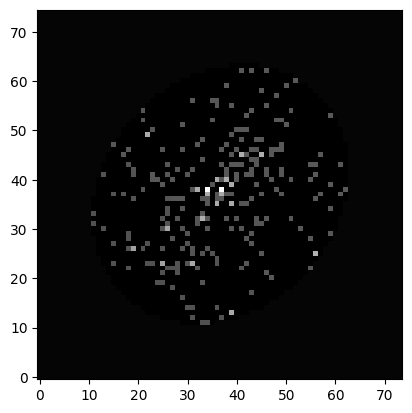

In [34]:
print(chan_ex.info())

chan_data=chan_ex[0].data
chan_wcs=wcs.WCS(chan_ex[0].header)
plt.imshow(chan_data, origin='lower', cmap='gray')

print(repr(chan_ex[0].header))

print(chan_wcs)


In [133]:
hdulst=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/spec_fits/Par050_speccat.fits')
tabhdu=hdulst[1]
jw_table=tabhdu.data

pic_hdulst=fits.open('/home/jacoblevine7/AGN_proj/agn_storage/big_pix/Par050_comb_drz_sci.fits')
pic_header=pic_hdulst[0].header
print(pic_header)
#            #get the wcs from the header

jw_wcs=wcs.WCS(pic_header)
data=pic_hdulst[0].data
            
im_scale=np.abs(pic_header['CD1_1']) #degrees per pixel

cscobj_table=pd.read_csv('/home/jacoblevine7/AGN_proj/agn_git/csc_table.csv', sep=',')

source=cscobj_table[cscobj_table['chan_filename']=='acisfJ1236516p621303_001N026_r0152b_regimg3.fits']
source_coords=coord.SkyCoord(ra=source['ra'], dec=source['dec'], unit=(u.deg, u.deg))


smaj_ax=source['error_ellipse_r0']
smin_ax=source['error_ellipse_r1']
ell_ang=source['error_ellipse_angle']

jw_coords=coord.SkyCoord(ra=jw_table['ra'],dec=jw_table['dec'],unit=(u.deg, u.deg))

#print(jw_coords.separation(source_coords), source['error_ellipse_r0']*1.5*u.arcsec)
criteria=jw_coords.separation(source_coords) < source['error_ellipse_r0'].item()*1.3*u.arcsec
            
candidates= jw_table[criteria]
cand_coords=jw_coords[criteria]
#candidates is a table of all the candidates in the region, with their coordinates
#cand_coords is a SkyCoord object of the candidates in the region
id_jw=candidates['id']



SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 6272                                                  NAXIS2  =                 6301                                                  DATE    = '2024-02-09'         / date this file was written (yyyy-mm-dd)        FILENAME= 'jw01571-f200w_drz_sci.fits' / Name of the file                       SDP_VER = '2023_3b '           / Data processing (DP) Software Version          PRD_VER = 'PRDOPSSOC-064'      / S&OC Project Reference Database (PRD) Version  OSS_VER = '9.1     '           / Observatory Scheduling Software (OSS) Version  GSC_VER = 'GSC2431 '           / Guide Star Catalog (GSC) Version               CAL_VER = '1.12.5  '           / Calibration Software Version                   CAL_VCS = 'RELEASE '           / Calibra

In [134]:
center=source_coords
size=(source['error_ellipse_r0'].item()*3*u.arcsec)
print(center)

cutout=Cutout2D(data,position=center,size=size,wcs=jw_wcs)
im_center=source_coords.to_pixel(cutout.wcs)
x_jw,y_jw=cand_coords.to_pixel(cutout.wcs)

print(jw_table['id'])



<SkyCoord (ICRS): (ra, dec) in deg
    [(189.18801296, 62.05239622)]>
[   4    5    6 ... 3634 3635 3636]


/home/jacoblevine7/.local/lib/python3.10/site-packages/matplotlib/transforms.py:2068: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 0] *= sx
/home/jacoblevine7/.local/lib/python3.10/site-packages/matplotlib/transforms.py:2069: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 1] *= sx
/home/jacoblevine7/.local/lib/python3.10/site-packages/matplotlib/transforms.py:2070: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 2] *= sx
/home/jacoblevine7/.local/lib/python3.10/site-packages/matplotlib/transforms.py:2071: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[

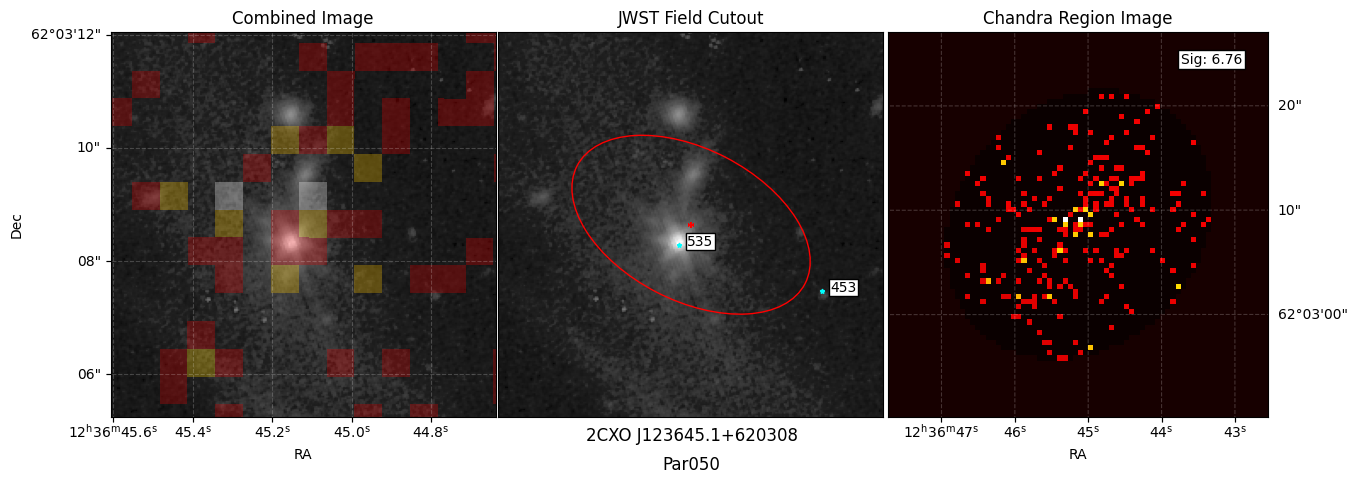

In [ ]:
#make 3 4x4 plots next to each other in one figure, each with its own axes object

cnorm_jw=mpl.colors.SymLogNorm(0.0005,0.1)


#make a colormap to use for the overlay data
base_cmap = plt.cm.hot
new_cmap = mpl.colors.ListedColormap(list(base_cmap(np.linspace(0, 1, 256))))
new_cmap.set_under(color=(1,0,0,0))  # Set the color for out_of_bounds values to transparent red

fig=plt.figure(figsize=(20,5))

gs=fig.add_gridspec(1,4,hspace=0,wspace=0)
ax1 = fig.add_subplot(gs[0, 0], projection=cutout.wcs)
ax2 = fig.add_subplot(gs[0, 1], projection=cutout.wcs)  
ax3 = fig.add_subplot(gs[0, 2], projection=chan_wcs)   

ax1.tick_params(axis='x',top=False, bottom=True, labelbottom=True)
ax1.tick_params(axis='y',right=False, left=True,labelleft=True)
ax1.set(xlabel='RA', ylabel='Dec')
ax1.set_title('Combined Image')

ax2.tick_params(axis='x',top=False, left=False, right=False,labelleft=False,labelbottom=False)
ax2.tick_params(axis='y',top=False, left=False, right=False,labelleft=False,labelbottom=False)
ax2.set(xlabel='RA', ylabel='Dec')
ax2.set_title('JWST Field Cutout')

ax3.tick_params(axis='x',top=False, labelbottom=True, bottom=True)
ax3.tick_params(axis='y', right=False, labelleft =False, labelright=True,left=False)
ax3.set(xlabel='RA',ylabel=' ')
ax3.set_title('Chandra Region Image')


ax1.set_xlim(0, cutout.data.shape[1])
ax1.set_ylim(0, cutout.data.shape[0])


ax1.imshow(cutout.data,origin='lower',cmap='gray',norm=cnorm_jw)
ax1.imshow(chan_data,origin='lower', cmap=new_cmap, vmin=0,transform=ax1.get_transform(chan_wcs), alpha=0.3)
ax1.grid(color='white', alpha=0.2, linestyle='--')

ax2.imshow(cutout.data,origin='lower',cmap='gray',norm=cnorm_jw)
ax2.text(cutout.data.shape[0]/2, -cutout.data.shape[1]/20, s=str(source['name'].item()), fontsize=12, color='black', ha='center', va='center')
ax2.text(cutout.data.shape[0]/2, -cutout.data.shape[1]/8, s=str(source['par_name'].item()), fontsize=12, color='black', ha='center', va='center')

ell=Ellipse(im_center,2*smin_ax/(3600*im_scale),
                            2*smaj_ax/(3600*im_scale),angle=-ell_ang,
                                                        fill=False,color='red')
ax2.add_patch(ell)
ax2.scatter(im_center[0],im_center[1],marker='+',color='red',s=20)

for i, txt in enumerate(id_jw):
    ax2.annotate(txt,(x_jw[i],y_jw[i]),xytext=(x_jw[i]+5,y_jw[i]),
                    bbox=dict(boxstyle="square,pad=0.1",
                            fc="white", ec="black"))
ax2.scatter(x_jw,y_jw,marker='*',s=8,color='cyan')


ax3.imshow(chan_data,origin='lower', cmap='hot')
ax3.grid(color='white', alpha=0.2, linestyle='--')
ax3.text(chan_data.shape[0]-chan_data.shape[0]/6, chan_data.shape[1]-chan_data.shape[1]/15, s='Sig: '+str(np.round(source['significance'].item(),3)),
    fontsize=10, ha='center', va='center',bbox=dict(boxstyle="square,pad=0.2", fc="white", ec="black"))
    #ax3.annotate('Sig: '+str(np.round(source['significance'].item(),4)),(chan_data.shape[0]-chan_data.shape[0]/6, chan_data.shape[1]-chan_data.shape[1]/6),xytext=(x_jw[i]+5,y_jw[i]),
        #              bbox=dict(boxstyle="square,pad=0.1", fc="white", ec="black"))


fig.show()


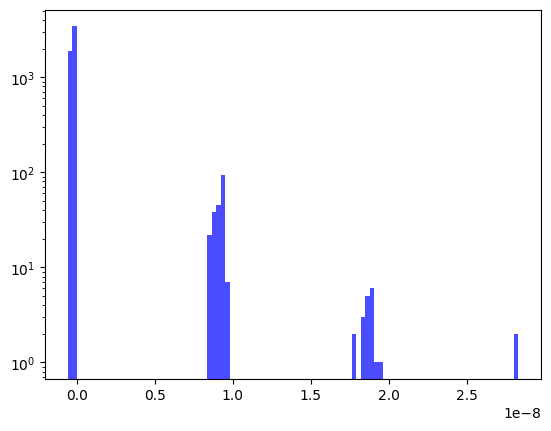

In [99]:
plt.hist(chan_data.flatten(), bins=100, color='blue', alpha=0.7)

#log scale the histogram
plt.yscale('log')
plt.show()